#  Исследование рынка видеоигр

   Мы будем исследовать мировой рынок видеоигр, выпускаемых различными платформами, по всему миру и нескольким значимым регионам в отдельности на основании данных из открытых источников о продажах игр, оценках пользователей и критиков, жанрах и платформах (таких, как ПК, Xbox,PS) за период 1980-2016 годы. 
   На основании имеющейся выборки мы спрогнозируем наиболее перспективные, успешные продукты, выявим, во что лучше вложиться в будущем (какой жанр, консоль и т.д.), по каким направлениям следует сделать рекламные компании.
   

1. Открываем файл и изучаем информацию

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
display(data.head(20))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
 data.duplicated().sum()  #проверка явных дубликатов

0

### Вывод: при первичном рассмотрении данных можно отметить, что в датафрейме присутсвуют пропущенные значения. Датафрейм состоит из 16715 игр и 11 столбцов. Явных дубликатов нет.

2. Подготовка данных.


2.1. Приведем названия столбцов к нижнему регистру

In [6]:
data.columns = [x.lower() for x in data.columns.values]  
display(data[630:640])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
630,Resistance 2,PS3,2008.0,Shooter,1.15,0.84,0.10,0.38,87.0,6.1,M
631,NBA 2K15,PS4,2014.0,Sports,1.47,0.54,0.01,0.43,83.0,7,E
632,Final Fantasy V,SNES,1992.0,Role-Playing,0.00,0.00,2.43,0.02,NaN,NaN,NaN
633,Final Fantasy Tactics,PS,1997.0,Role-Playing,0.93,0.12,1.34,0.06,83.0,8.2,T
634,Midnight Club: Los Angeles,PS3,2008.0,Racing,1.56,0.53,0.05,0.31,82.0,8.2,T
635,Twisted Metal 2,PS,1996.0,Racing,2.12,0.25,0.00,0.07,NaN,NaN,NaN
636,The Sims: Bustin' Out,PS2,2003.0,Simulation,1.07,1.19,0.00,0.18,81.0,8.4,T
637,Riven: The Sequel to Myst,PC,1997.0,Adventure,1.52,0.82,0.00,0.10,83.0,NaN,E
638,LEGO Harry Potter: Years 1-4,Wii,2010.0,Action,1.28,0.93,0.00,0.22,79.0,8,E10+
639,Need for Speed (2015),PS4,2015.0,Racing,0.50,1.50,0.05,0.37,NaN,NaN,NaN


2.2. Изменим, где необходимо, типы данных в столбцах, изучим пропуски и заполним пропуски значениями, где это возможно.

In [7]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') #"tbd" означает "to be defined", с помощью errors='coerce' создали возможность поменять тип данных в этом столбце
data['user_score'] = data['user_score'].astype(float) #привели этот столбец к типу "float", так как по сути это числа, но не целые, теперь с ними можно проводить математические операции
data.info()
# столбец year_of_release	 пока не меняем на тип int, так как для этого надо сначала избавиться от пропусков.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [8]:
#пропуски
#data[data['name'].isna()]
data = data.dropna(subset=['name']).reset_index(drop=True) #удалили строки с недостающими данными в этом столбце, так как самостоятельная придумка или угадывание названия игры не имеет смысла, данные не будут соответствовать реальности, таких строк всего 2, значит, их удаление не отразится на репрезентативности данных.
#data[data['name'].isna()]
#data[data['platform'].isna()]
#data[data['year_of_release'].isna()]
data = data.dropna(subset=['year_of_release']).reset_index(drop=True) #удалили строки с недостающими данными в этом столбце, так как самостоятельная придумка или угадывание года исказят данные, таких строк менее 10% от всей выборки, значит, их удаление не отразится на репрезентативности данных.
data[data['year_of_release'].isna()] #удалили строки с недостающими данными в этом столбце, так как самостоятельная придумка или угадывание года исказят данные, таких строк менее 10% от всей выборки, значит, их удаление не отразится на репрезентативности данных.
#data[data['year_of_release'].isna()]
#data[data['genre'].isna()]
#data[data['na_sales'].isna()]
#data[data['eu_sales'].isna()]
#data[data['jp_sales'].isna()]
#data[data['other_sales'].isna()]
#data[data['critic_score'].isna()] #в этом столбце пропуски более, чем в 10% от всех наблюдений, поэтому удалить не можем. Если заполним средним или медианой, то исказим данные, поэтому оставляем без изменений. Предполагаю, что не все игры были оценены критиками.
#data[data['user_score'].isna()] #в этом столбце пропуски более, чем в 10% от всех наблюдений, поэтому удалить не можем. Если заполним средним или медианой, то исказим данные, поэтому оставляем без изменений. Предполагаю, что не все игры были оценены пользователями (вероятно, игры не имели широкого распространения на рынке).
data[data['rating'].isna()]
data['rating'] = data['rating'].fillna(value='ND') #пустые значения заменили на ND (не определен)
data['rating'] = data['rating'].replace('K-A', 'E') #заменим устаревшую абревиатуру.  E был добавлен в рейтинги ESRB в 1997 году в качестве замены рейтингов K-A и EC.
data[data['rating'].isna()]
data['year_of_release'] = data['year_of_release'].astype(int) #nan удалены, теперь привели столбец к int, так как год релиза - это всегда целое число.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


2.3. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.


In [9]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] #посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.
display(data['total_sales'])

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16439     0.01
16440     0.01
16441     0.01
16442     0.01
16443     0.01
Name: total_sales, Length: 16444, dtype: float64

### Вывод:
1. мы привели данные к нижнему регистру;
2. поменяли типы данных в столбцах 'user_score' и 'year_of_release' в соответствии с сутью данных в них;
3. удалили строки с недостающими данными в столбцах 'name','year_of_release' (вероятно, эти значения пропущены ввиду технической ошибки или обусловлены человеческим фактором);
4. столбцы 'critic_score' и 'user_score' оставили без изменений (вероятно, пропуски связаны с тем, что не все игры были оценены пользователями и критиками, судя по всему, по причине того, что эти игры не имели широкого распространения на рынке);
5. в столбце рейтинг заменили устаревшую абревиатуру, а также заменили пропуски на "ND" (вероятно, пропуски связаны с тем, что ESRB предназначен для рецензирования игр на территории Северной Америки (США, Канады, Мексики), поэтому игры, произведенные в других странах не имеют этого рейтинга, соответственно столбец рейтинга по ним не заполнен);
6. создали столбец с суммарными продажами по всем регионам.

In [10]:
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

3. Рассмотрим продажи и релизы по различным жанрам и платформам в представленный в нашей выборке период, выявим факторы, влияющие на продажи и перспективные продукты.



3.1. Посмотрим, сколько игр выпускалось и продавалось в разные годы с помощью графиков и группировки

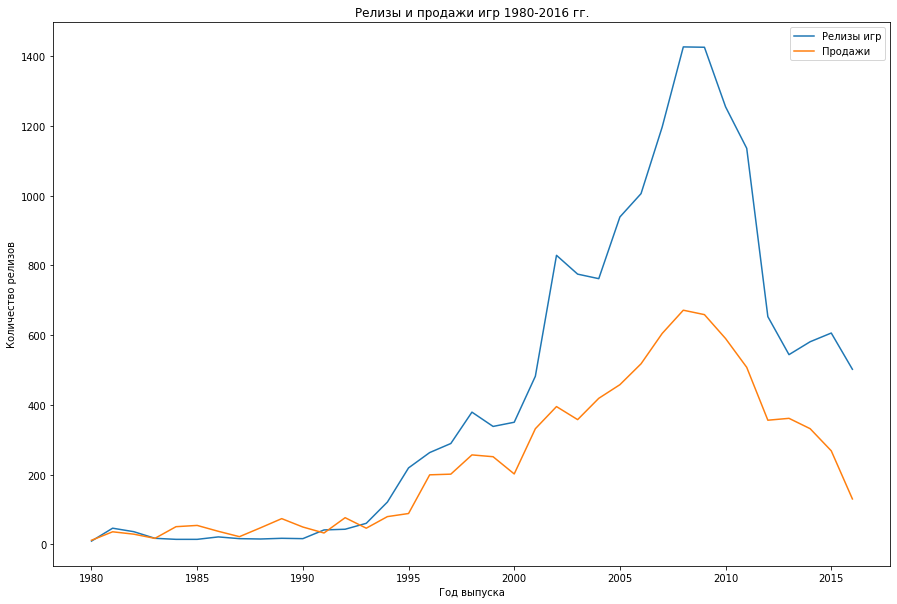

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
Name: name, dtype: int64

In [11]:
plt.figure(figsize=(15,10))
plt.plot(data.groupby('year_of_release')['name'].count(), label='Релизы игр')
plt.plot(data.groupby('year_of_release')['total_sales'].sum(), label='Продажи')
plt.xlabel('Год выпуска')
plt.ylabel('Количество релизов')
plt.title('Релизы и продажи игр 1980-2016 гг.')
plt.legend()
plt.show()
data.groupby('year_of_release')['name'].count().sort_values(ascending=True).head(10)
data.groupby('year_of_release')['name'].count().sort_values(ascending=False).head(10) 


посмотрели, сколько игр выпускалось в разные годы с помощью графиков и группировки. 
До 1995 года количество релизов в год не превышало 200,поэтому эти данные будем считать неактуальными. С 1995 года идет заметное увеличение количества выпущенных игр. 
Вероятно, это связано с повсеместным развитием компьютерных технологий, развитием интернета, как общедоступной службы (с 1991 года)
Наибольшего взлета игры достигли в 2008-2009 годах (1427 и 1426 релизов в год соответственно)

3.2. Посмотрим объем продаж по различным платформам в разные годы с помощью графиков и группировки

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64


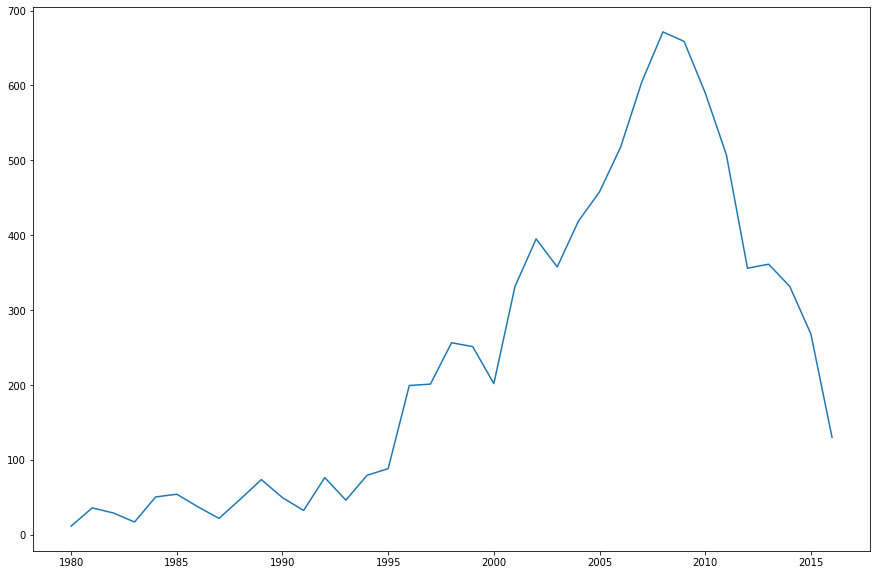

In [12]:
data_95 = data[data['year_of_release'] > 1994] #создадим датафрейм с актуальными данными
platform_sales = data_95.pivot_table(index='platform', 
                                      values='total_sales', 
                                      columns = 'year_of_release', 
                                      aggfunc = 'sum',
                                      fill_value=0, 
                                      margins=True).reset_index()    # сводная таблица -  продажи по платформам и годам

plt.figure(figsize=(15,10))
plt.plot(data.groupby('year_of_release')['total_sales'].sum(), label='Продажи') # график -  продажи по платформам и годам
top_platforms = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10) #топ-10 платформ с наибольшими суммарными продажами
print(top_platforms)



если смотреть по всем годам, то с большим отрывом лидирует ps2, далее идут X360 и PS3 и т.д. Эти платформы потенциально наиболее прибыльны.

3.3. Оценим продолжительность жизни платформ

In [13]:
platform_life = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index() # создадим сводную таблицу
platform_life.set_axis(['platform', 'first_year', 'last_year'], axis='columns', inplace=True) # переименуем столбцы для удобства
platform_life['length'] = platform_life.last_year - platform_life.first_year
display(platform_life['length'].describe())
display(platform_life[platform_life['length'] == 31]) 
display(platform_life[platform_life['length'] == 0]) 
  

count    31.000000
mean      7.612903
std       6.998464
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: length, dtype: float64

,platform,first_year,last_year,length
13,PC,1985,2016,31


,platform,first_year,last_year,length
9,GG,1992,1992,0
14,PCFX,1996,1996,0
24,TG16,1995,1995,0


средняя продолжительность жизни платформ составляет около 8 лет, медианная - 6 лет. Самая долгоживущая платформа - персональный компьютер (более 31 года).


3.4. Выберем актуальный период (на основании проведенных выше иссследований) и исследуем продажи по платформам за актуальный период

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
Name: total_sales, dtype: float64


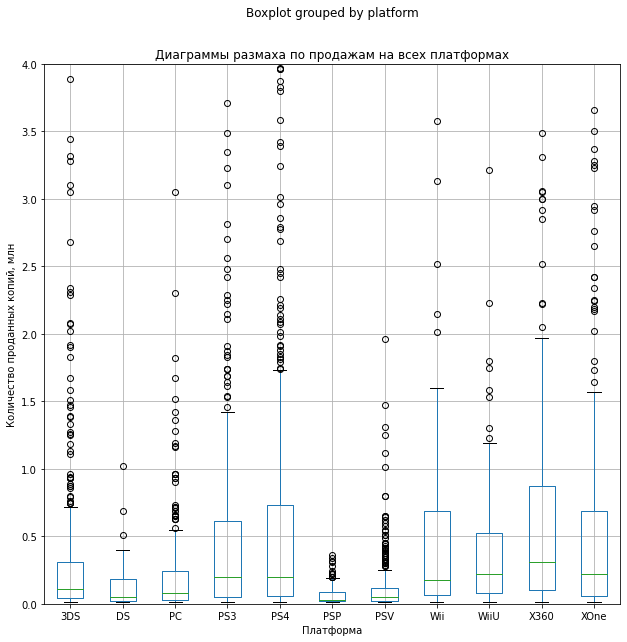

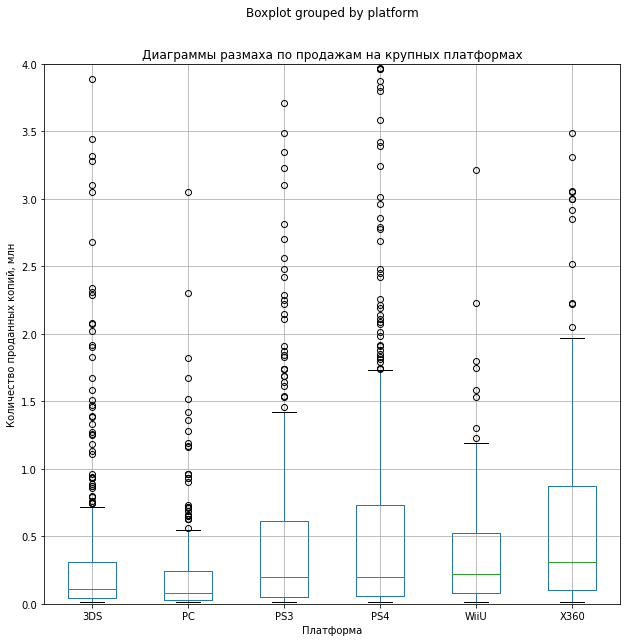

In [14]:
data_actual = data.query('year_of_release > 2011') 
newtop_platforms = data_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10) #топ-10 платформ с наибольшими суммарными продажами по более свежим, неустаревщим данным с учетом продолжительности жизни платформ
print(newtop_platforms)
data_actual[['platform', 'name', 'total_sales']].boxplot(column='total_sales', by='platform', figsize=(10,10)) #построим диаграмму размаха
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам на всех платформах')
plt.ylim(0, 4)
plt.show()
actual_platforms = ["PS3","PS4", "WiiU", "X360", "PC", "3DS"]
data_actual.query('platform in @actual_platforms')[['platform', 'name', 'total_sales']].boxplot(column='total_sales', by='platform', figsize=(10,10)) #построим диаграмму размаха за более свежие годы по наиболее значимым платформам
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам на крупных платформах')
plt.ylim(0, 4)
plt.show()
   

Лидером продаж является PlayStation 4, но и размах продаж у нее самый большой, ПК является самой непопулярной, но самой стабильной из рассмотренных подробно платформой (размах самый узкий). 
Медианные продажи по каждой из платформ меньше 1 млн, выбросы показывают, что каждая платформа иногда выпускает хиты, доля таких успешных проектов выше всего у PlayStation 4.
по свежим данным более персепективны PS4 PS3 X360, но можно пойти по пути стабильности и вложиться в ПК. 

3.5. Рассмотрим связь продаж и оценок пользователей и критиков по различным платформам

Корреляция между оценкой критиков и продажами: 0.41
Корреляция между оценкой пользователей и продажами: -0.03


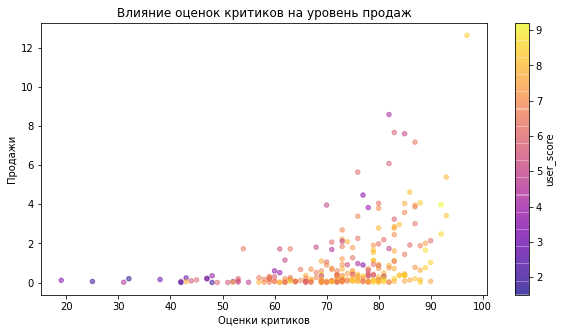

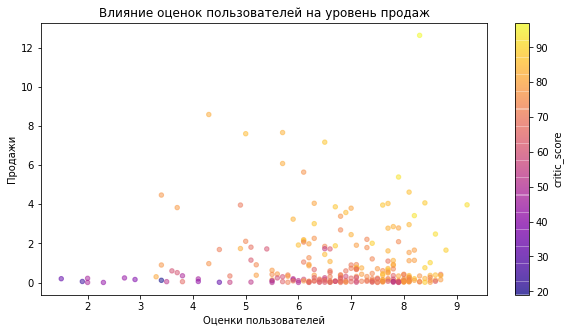

In [15]:
data_ps = data_actual.query('platform == "PS4"') # рассмотрим данные по PS4

print(f'Корреляция между оценкой критиков и продажами: {data_ps.critic_score.corr(data_ps.total_sales).round(2)}')
print(f'Корреляция между оценкой пользователей и продажами: {data_ps.user_score.corr(data_ps.total_sales).round(2)}')

data_ps.plot.scatter('critic_score',  'total_sales', figsize=(10, 5), alpha=0.5, c='user_score', colormap='plasma', sharex=False) #диаграмма рассеивания для оценок критиков и продаж PS4
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')
plt.title('Влияние оценок критиков на уровень продаж')
plt.show()
data_ps.plot.scatter('user_score', 'total_sales', figsize=(10, 5), alpha=0.5, c='critic_score', colormap='plasma', sharex=False)#диаграмма рассеивания для оценок пользователей и продаж PS4
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.title('Влияние оценок пользователей на уровень продаж')
plt.show()




по данным по PS4 заметная связь просматривается между оценками критиков и продажами, незначительная связь просматривается между оценками пользователей и продажами.

Корреляция между оценкой критиков и продажами: 0.36
Корреляция между оценкой пользователей и продажами: 0.01


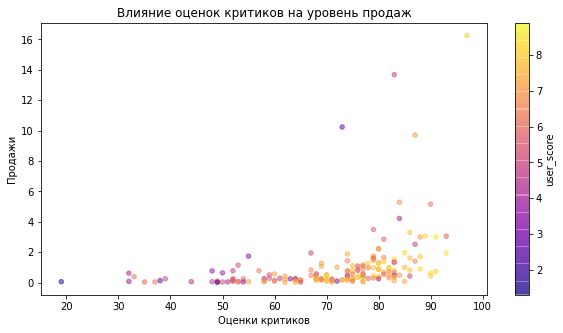

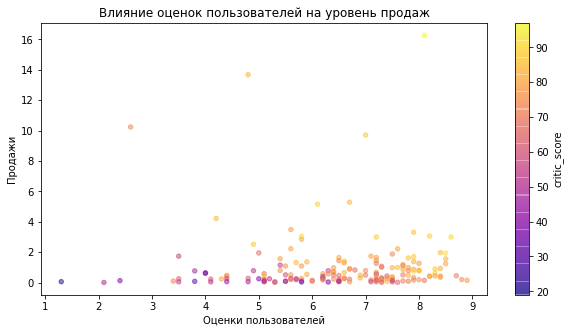

In [16]:
data_xb = data_actual.query('platform == "X360"') # рассмотрим данные по X360

print(f'Корреляция между оценкой критиков и продажами: {data_xb.critic_score.corr(data_xb.total_sales).round(2)}')
print(f'Корреляция между оценкой пользователей и продажами: {data_xb.user_score.corr(data_xb.total_sales).round(2)}')

data_xb.plot.scatter('critic_score',  'total_sales', figsize=(10, 5), alpha=0.5, c='user_score', colormap='plasma', sharex=False) #диаграмма рассеивания для оценок критиков и продаж PS4
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')
plt.title('Влияние оценок критиков на уровень продаж')
plt.show()
data_xb.plot.scatter('user_score', 'total_sales', figsize=(10, 5), alpha=0.5, c='critic_score', colormap='plasma', sharex=False)#диаграмма рассеивания для оценок пользователей и продаж PS4
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.title('Влияние оценок пользователей на уровень продаж')
plt.show()

по данным по X360 заметная связь просматривается между оценками критиков и продажами, незначительная связь просматривается между оценками пользователей и продажами.

Корреляция между оценкой критиков и продажами: 0.32
Корреляция между оценкой пользователей и продажами: 0.2


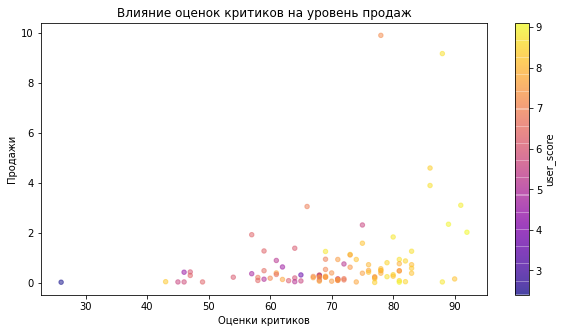

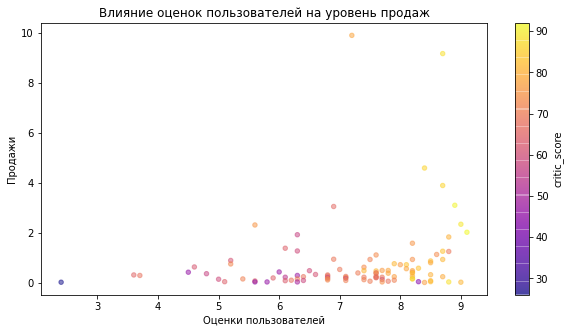

In [17]:
data_3DS = data_actual.query('platform == "3DS"') # рассмотрим данные по 3DS

print(f'Корреляция между оценкой критиков и продажами: {data_3DS.critic_score.corr(data_3DS.total_sales).round(2)}')
print(f'Корреляция между оценкой пользователей и продажами: {data_3DS.user_score.corr(data_3DS.total_sales).round(2)}')

data_3DS.plot.scatter('critic_score',  'total_sales', figsize=(10, 5), alpha=0.5, c='user_score', colormap='plasma', sharex=False) #диаграмма рассеивания для оценок критиков и продаж PS4
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')
plt.title('Влияние оценок критиков на уровень продаж')
plt.show()
data_3DS.plot.scatter('user_score', 'total_sales', figsize=(10, 5), alpha=0.5, c='critic_score', colormap='plasma', sharex=False)#диаграмма рассеивания для оценок пользователей и продаж PS4
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.title('Влияние оценок пользователей на уровень продаж')
plt.show()

по данным по 3DS заметная связь просматривается между оценками критиков и продажами, незначительная связь просматривается между оценками пользователей и продажами.

Корреляция между оценкой критиков и продажами: 0.24
Корреляция между оценкой пользователей и продажами: -0.12


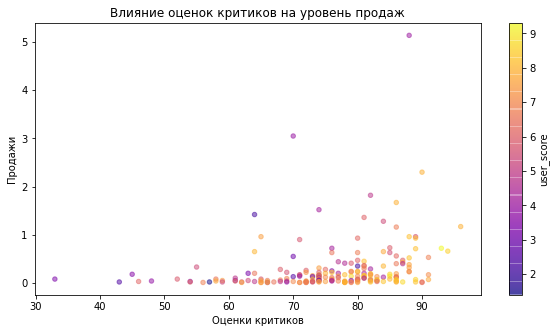

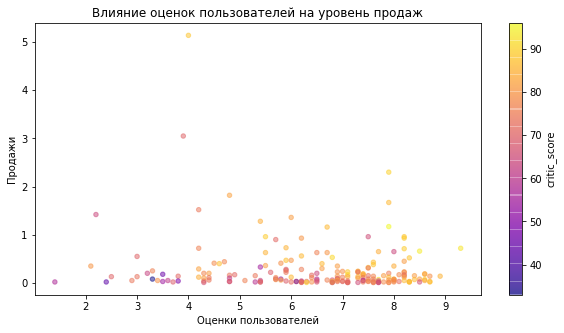

In [18]:
data_PC = data_actual.query('platform == "PC"') # рассмотрим данные по PC

print(f'Корреляция между оценкой критиков и продажами: {data_PC.critic_score.corr(data_PC.total_sales).round(2)}')
print(f'Корреляция между оценкой пользователей и продажами: {data_PC.user_score.corr(data_PC.total_sales).round(2)}')

data_PC.plot.scatter('critic_score',  'total_sales', figsize=(10, 5), alpha=0.5, c='user_score', colormap='plasma', sharex=False) #диаграмма рассеивания для оценок критиков и продаж PS4
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')
plt.title('Влияние оценок критиков на уровень продаж')
plt.show()
data_PC.plot.scatter('user_score', 'total_sales', figsize=(10, 5), alpha=0.5, c='critic_score', colormap='plasma', sharex=False)#диаграмма рассеивания для оценок пользователей и продаж PS4
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.title('Влияние оценок пользователей на уровень продаж')
plt.show()

по данным по ПК заметная связь просматривается между оценками критиков и продажами, незначительная связь просматривается между оценками пользователей и продажами.

Корреляция между оценкой критиков и продажами: 0.33
Корреляция между оценкой пользователей и продажами: -0.01


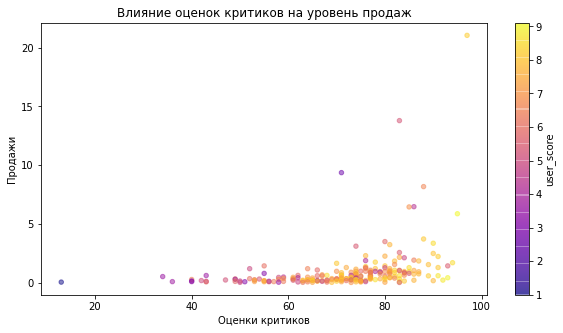

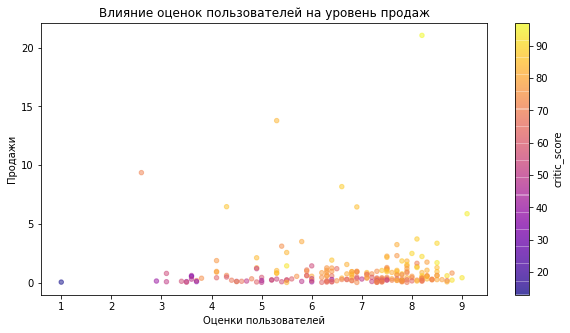

In [19]:
data_ps3 = data_actual.query('platform == "PS3"') # рассмотрим данные по PS3

print(f'Корреляция между оценкой критиков и продажами: {data_ps3.critic_score.corr(data_ps3.total_sales).round(2)}')
print(f'Корреляция между оценкой пользователей и продажами: {data_ps3.user_score.corr(data_ps3.total_sales).round(2)}')

data_ps3.plot.scatter('critic_score',  'total_sales', figsize=(10, 5), alpha=0.5, c='user_score', colormap='plasma', sharex=False) #диаграмма рассеивания для оценок критиков и продаж PS4
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')
plt.title('Влияние оценок критиков на уровень продаж')
plt.show()
data_ps3.plot.scatter('user_score', 'total_sales', figsize=(10, 5), alpha=0.5, c='critic_score', colormap='plasma', sharex=False)#диаграмма рассеивания для оценок пользователей и продаж PS4
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.title('Влияние оценок пользователей на уровень продаж')
plt.show()

по данным по PS3 заметная связь просматривается между оценками критиков и продажами, незначительная связь просматривается между оценками пользователей и продажами.

Корреляция между оценкой критиков и продажами: 0.31
Корреляция между оценкой пользователей и продажами: 0.0


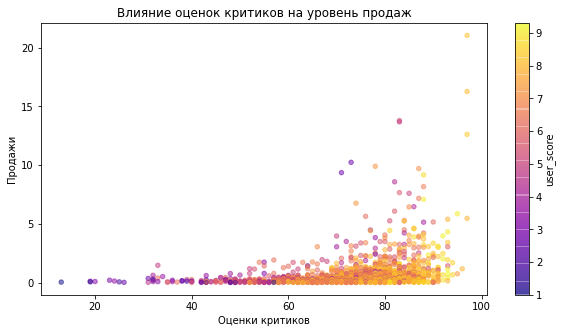

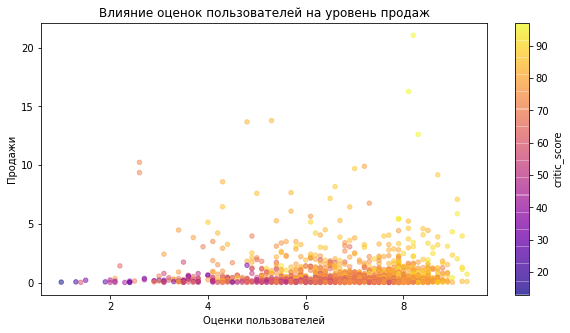

In [20]:
print(f'Корреляция между оценкой критиков и продажами: {data_actual.critic_score.corr(data_actual.total_sales).round(2)}')
print(f'Корреляция между оценкой пользователей и продажами: {data_actual.user_score.corr(data_actual.total_sales).round(2)}')

data_actual.plot.scatter('critic_score',  'total_sales', figsize=(10, 5), alpha=0.5, c='user_score', colormap='plasma', sharex=False) #диаграмма рассеивания для оценок критиков и продаж
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')
plt.title('Влияние оценок критиков на уровень продаж')
plt.show()
data_actual.plot.scatter('user_score', 'total_sales', figsize=(10, 5), alpha=0.5, c='critic_score', colormap='plasma', sharex=False)#диаграмма рассеивания для оценок пользователей и продаж
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.title('Влияние оценок пользователей на уровень продаж')
plt.show()



по данным по всем платформам также, как и по популярным, заметная связь просматривается между оценками критиков и продажами, незначительная связь просматривается между оценками пользователей и продажами.
При этом наиболее выражена связь между оценками критиками и продажами у PS4 (лидер продаж), наименьшая из рассмотренных подробно - у ПК (меньше всего продаж из рассмотренных крупных платформ).

3.6. Выявим популярные жанры

genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Name: total_sales, dtype: float64
genre
Puzzle            4.89
Strategy         13.34
Adventure        29.43
Simulation       35.12
Fighting         44.49
Racing           53.50
Platform         61.00
Misc             85.04
Sports          181.07
Role-Playing    192.80
Name: total_sales, dtype: float64


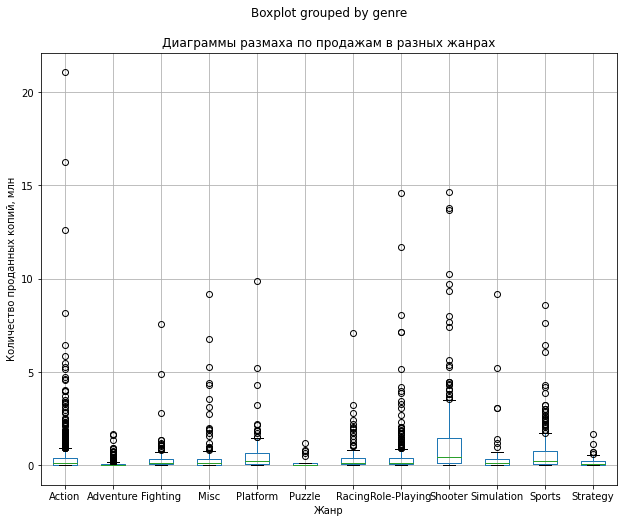

,genre,sum,mean,median,std,count
,,total_sales,total_sales,total_sales,total_sales,total_sales
8,Shooter,304.73,1.296723,0.440,2.251662,235
10,Sports,181.07,0.675634,0.240,1.136378,268
4,Platform,61.00,0.717647,0.210,1.364413,85
7,Role-Playing,192.80,0.521081,0.140,1.315937,370
6,Racing,53.50,0.465217,0.140,0.888664,115
2,Fighting,44.49,0.408165,0.130,0.910385,109
0,Action,441.12,0.427856,0.120,1.166504,1031
3,Misc,85.04,0.442917,0.120,1.081047,192
9,Simulation,35.12,0.439000,0.120,1.244500,80


Жанр Action, количество бестселлеров - 38, доля хитов от общего числа релизов 0.037
Жанр Sports, количество бестселлеров - 26, доля хитов от общего числа релизов 0.097
Жанр Shooter, количество бестселлеров - 43, доля хитов от общего числа релизов 0.18
Жанр Role-Playing, количество бестселлеров - 18, доля хитов от общего числа релизов 0.049
Жанр Platform, количество бестселлеров - 6, доля хитов от общего числа релизов 0.071


In [21]:
top_genres = data_actual.groupby('genre')['total_sales'].sum().sort_values(ascending=False).head(10) #топ-10 жанров с наибольшими суммарными продажами по более свежим, неустаревщим данным с учетом продолжительности жизни платформ
print(top_genres)
bad_genres = data_actual.groupby('genre')['total_sales'].sum().sort_values(ascending=True).head(10) #антитоп
print(bad_genres)
data_actual[['total_sales', 'genre']].boxplot(column='total_sales', by='genre', figsize=(10,8))
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам в разных жанрах')
plt.show()
display(data_actual
        .pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'mean', 'median', 'std', 'count'])
        .reset_index().sort_values(('median', 'total_sales'), ascending=False))

for i in ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform']:
    с = data_actual[(data_actual['genre'] == i) & (data_actual['total_sales'] > 2)]['total_sales'].count()
    print(f'Жанр {i}, количество бестселлеров - {с}, доля хитов от общего числа релизов {(с/data_actual[data_actual["genre"] == i]["total_sales"].count()):.2}')

Наиболее популярные данные по медианным продажам: Shooter, Sports,Platform  наименее - Strategy,Puzzle,Adventure.
Также на основе этих данных стоит отметить, что экшионы лидеры по количеству релизов и валовым продажам, но по медианым продажам экшионы не входят в топ-5, шутеры лидируют по средним и медианным продажам, а также по доле бестселлеров среди выпущенных игр.

### Вывод:
1. до 1995 года количество релизов в год не превышало 200, наибольшего взлета игры достигли в 2008-2009 годах (1427 и 1426 релизов в год соответственно);
2. если смотреть данные за все годы в нашей выборке, то с большим отрывом лидирует ps2, далее идут X360 и PS3 и т.д.;
3. средняя продолжительность жизни платформ составляет около 8 лет, медианная - 6 лет, самая долгоживущая платформа - персональный компьютер (более 31 года);
4. по свежим данным с учетом продолжительности жизни платформ более персепективны в плане прибыльности PS4 PS3 X360, но можно пойти по пути стабильности и вложиться в ПК;
5. лидером продаж после 2011 года является PlayStation 4, но и размах продаж у нее самый большой, ПК является самой непопулярной, но самой стабильной из рассмотренных подробно платформой (размах самый узкий);
6. медианные продажи по каждой из платформ меньше 1 млн, выбросы показывают, что каждая платформа иногда выпускает хиты, доля таких успешных проектов выше всего у PlayStation 4;
7. оценки критиков заметно влияют на продажи, оценки пользователей влияют незначительно;
8. Наиболее популярные данные по медианным продажам: Shooter, Sports,Platform  наименее - Strategy,Puzzle,Adventure.



4. Рассмотрим особенности в продажах игр по регионам

4.1. Посмотрим топ по платформам

In [22]:
top_platforms_na = data_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
print(top_platforms_na)
top_platforms_eu = data_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
print(top_platforms_eu)
top_platforms_jp = data_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
print(top_platforms_jp)


platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64
platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64
platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64


В Северной Америке и Европе похожая картина, но в Америке X360 на первом месте, в Европе - на 3-м, также в Америке XOne почти в 2 раза лучше продавался, чем в Европе.
В Японии заметно ниже количество проданных копий по всем платформам и совсем другое распределение мест в топе. Так на первом месте в Японии 3DS, занимающее последнее место в Америке и Европе.


4.2. Посмотрим топ по жанрам

In [23]:
top_genres_na = data_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
print(top_genres_na)
top_genres_eu = data_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
print(top_genres_eu)
top_genres_jp = data_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
print(top_genres_jp)


genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64
genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64
genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64


 В Северной Америке и Европе похожая картина,в Америке несколько больше общее количество проданных копий, в Америке на последнем месте Misc, в Европе -Racing.
 В Японии другая картина: наиболее популярны Role-Playing, а Shooter и Sports вообще отсутствуют в топ-5.
Вероятно, предпочтения тех или иных жанров зависит от менталитета, японцы имеют традиции и вкусы, очень отличные от европейцев и американцев.


4.3. Посмотрим зависимость продаж по регионам от рейтинга

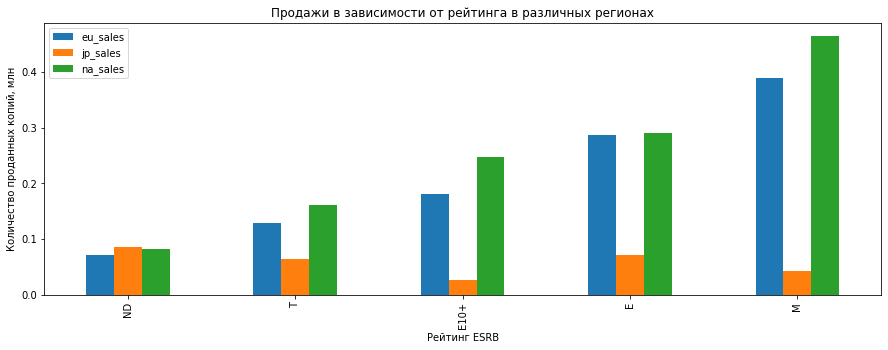

In [24]:
data_actual.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='mean').sort_values(by='na_sales').plot(kind='bar', figsize=(15, 5))
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество проданных копий, млн')
plt.title('Продажи в зависимости от рейтинга в различных регионах')
plt.show()


Рейтинг ESRB заметно влияет на продажи в Америке и Европе и не имеет очевидной связи с продажами в Японии.
Вероятно, это связано с тем, что ESRB предназначен для рецензирования игр на территории Северной Америки (США, Канады, Мексики). Поэтому в Японии популярны игры без этого рейтинга (судя по всему, это игры, созданные в Японии, соответственно не получавшие рейтинга, но популярные на своей родине).


### Вывод:
1. каждый из рассмотренных регионов имеет свои особенности и отличается по долям продаж, при этом Северная Америка и Европа близки по показателям, а Япония заметно отличается;
2. самые большие продажи игр из рассмотренных регионов наблюдаются в Северной Америке, на втором месте - Европа, на 3-м - Япония;
3. в Европе и Северной Америке наиболее популярны X360,PS4 и 3, в Японии - 3DS;
4. в Европе и Северной Америке наиболее популярны экшионы, шутеры и спортивные игры, в Японии - ролевые игры и экшионы, вероятно, в связи с различиями менталитетов;
5. рейтинг ESRB заметно влияет на продажи в Северной Америке и Европе (наиболее популярны фильмы для взрослых) и не имеет очевидной связи с продажами в Японии, в Японии, судя по всему, более популярны местные игры.


5. Рассмотрим 2 гипотезы по рейтингам.

5.1. Гипотеза 1.
Нулевая гипотеза - "средние пользовательские рейтинги платформ Xbox One и PC не отличаются". Альернативная гипотеза - "средние пользовательские рейтинги платформ Xbox One и PC отличаются".
Значение критического уровня вероятности (альфа) примем равным 5%.


In [25]:

results = st.ttest_ind(
    data_actual[(data_actual.platform == "XOne") & (data_actual.user_score.notna())]['user_score'], 
    data_actual[(data_actual.platform == "PC") & (data_actual.user_score.notna())]['user_score']
)
alpha = 0.05  # критический уровень статистической значимости
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 



p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


выбрала такой критический уровень статистической значимости, так как согласно теории наиболее распространен такой уровень и 0.01, но 0.01 кажется мне маловатым.
H₀ всегда формулируется так, чтобы использовать знак равенства, в остальном формулировка идет по сути предположения,
альтернативная гипотеза противоположна нулевой, всегда верна либо нулевая гипотеза, либо альтернативная.

Получившееся p-value невелико, вероятность получить такие значения статистически мала. 
Вывод: средние пользовательские рейтинги платформ Xbox One и PC не отличаются.

5.2. Гипотеза 2.Нулевая гипотеза - "средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не отличаются".Альернативная гипотеза -  "средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») отличаются".Значение критического уровня вероятности (альфа) примем равным 5%.


In [26]:
results = st.ttest_ind(
    data_actual[(data_actual.genre == "Action") & (data_actual.user_score.notna())]['user_score'], 
    data_actual[(data_actual.genre == "Sports") & (data_actual.user_score.notna())]['user_score']
)

alpha = 10  # критический уровень статистической значимости
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 



p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


выбрала такой критический уровень статистической значимости, так как согласно теории наиболее распространен такой уровень и 0.01, но 0.01 кажется мне маловатым.
H₀ всегда формулируется так, чтобы использовать знак равенства, в остальном формулировка идет по сути предположения,
альтернативная гипотеза противоположна нулевой, всегда верна либо нулевая гипотеза, либо альтернативная.

Так как принятый критический уровень вероятности 5%, гипотезу следует отвергнуть как маловероятную.
Вывод:средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») отличаются

### Вывод:
1. оценки пользователей не зависят от платформ;
2. оценки пользователей зависят от жанров игр;
3. на основании принятого нами значения критического уровня статистической значимости 5% мы можем предполагать, что первая гипотеза верна, а вторая нет.


# Общий вывод.

Мы изучили выборку по видеоиграм, вышедшим с 1980 по 2016 годы на различных платформах. Основываясь на этих данных мы спрогнозировали, какие игры могут хорошо продаваться в 2017 году, а также составили портреты пользователей разных регионов.

Мы отметили следующие общие особенности:
1. до 1995 года количество релизов в год не превышало 200, пика игры достигли в 2008-2009 годах (1427 и 1426 релизов в год соответственно);
2. средняя продолжительность жизни платформ составляет около 8 лет, медианная - 6 лет, самая долгоживущая платформа - персональный компьютер (более 31 года);
3. по свежим данным с учетом продолжительности жизни платформ более перспективны в плане прибыльности PS4, PS3, X360, но можно пойти по пути стабильности и вложиться в ПК;
4. лидером продаж после 2011 года является PlayStation 4, но и размах продаж у нее самый большой, ПК является самой непопулярной, но самой стабильной из рассмотренных подробно платформой (размах самый узкий);
5. медианные продажи по каждой из платформ меньше 1 млн, выбросы показывают, что каждая платформа иногда выпускает хиты, доля таких успешных проектов выше всего у PlayStation 4;
6. оценки критиков заметно влияют на продажи, оценки пользователей влияют незначительно;
7. наиболее популярные данные по медианным продажам: Shooter, Sports,Platform,  наименее - Strategy,Puzzle,Adventure.;
8. оценки пользователей не зависят от платформ, но зависят от жанров игр.

Также мы выделили особенности предпочтений пользователей в зависимости от региона:
1. каждый из рассмотренных регионов имеет свои особенности и отличается по долям продаж, при этом Северная Америка и Европа близки по показателям, а Япония заметно отличается, вероятно, в связи с различиями в менталитете;
2. самые большие продажи игр из рассмотренных регионов наблюдаются в Северной Америке, на втором месте - Европа, на 3-м - Япония;
3. в Европе и Северной Америке наиболее популярны X360,PS4 и 3, в Японии - 3DS;
4. в Европе и Северной Америке наиболее популярны экшионы, шутеры и спортивные игры, в Японии - ролевые игры и экшионы;
5. рейтинг ESRB заметно влияет на продажи в Северной Америке и Европе (наиболее популярны фильмы для взрослых) и не имеет очевидной связи с продажами в Японии, в Японии, судя по всему, более популярны местные игры.
